In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle

In [2]:
def load_data(max_num):
    data = []
    for i in range(1,max_num+1):
        filename = './dataset/dataset_' + str(i) + '.pkl'
        with open(filename, 'rb') as f:
            data += pickle.load(f)
    return data

In [3]:
data = load_data(8)

汉字图片数量： 673475
图片大小： (44, 32, 3)
汉字： 店


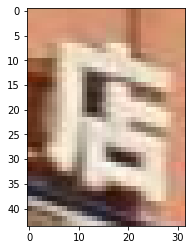

In [6]:
#汉字图片数量
print('汉字图片数量：',len(data))

image = data[660510]
print('图片大小：',image[0].shape) 
print('汉字：',image[1])
plt.imshow(image[0])

In [7]:
#统计各汉字出现次数
charCount = {}
for i in range(len(data)):
    if(data[i][1] in charCount):
        charCount[data[i][1]] += 1
    else:
        charCount[data[i][1]] = 1

In [8]:
#汉字数组
char_list = np.array(list(charCount.keys()))
#出现次数数组
count_list = np.array(list(charCount.values()))

In [9]:
#汉字类别数量
len(char_list)

3501

In [10]:
#按汉字出现次数从大到小排序
sorted_index = np.argsort(-count_list)

sorted_char_list = char_list[sorted_index]
sorted_count_list = count_list[sorted_index]

In [17]:
index = 599
print('出现次数最多的汉字：%s ；出现次数：%d'%(sorted_char_list[0],sorted_count_list[0]))
print('出现次数排第%d的汉字：%s ；出现次数：%d'%(index+1,sorted_char_list[index],
                                 sorted_count_list[index]))

出现次数最多的汉字：中 ；出现次数：11581
出现次数排第600的汉字：勤 ；出现次数：240


### 从数据集出现次数排前600的汉字中各抽取200个作为训练集，即训练集数量为120000；同样，各抽取40个作为测试集，即测试集数量为24000

In [18]:
data_all = []
label_all = []

num_classes = 600
num_each_class_train = 200 #每个类别的训练样本数量
num_each_class_test = 40 #每个类别的测试样本数量
num_each_class = num_each_class_train + num_each_class_test
for i in range(num_classes):
    char = sorted_char_list[i]
    
    count = 0
    for j in range(len(data)):
        if(count>=num_each_class_train + num_each_class_test):
            break
        if(data[j][1] == char):
            data_all.append(data[j][0])
            label_all.append(i+1)
            count += 1

In [21]:
# 分出训练集和测试集
train_data = []
train_label = []
test_data = []
test_label = []

for i in range(num_classes): #20000
    test_data += data_all[i*num_each_class:i*num_each_class+num_each_class_test]
    test_label += label_all[i*num_each_class:i*num_each_class+num_each_class_test]
    
    train_data += data_all[i*num_each_class+num_each_class_test:(i+1)*num_each_class]
    train_label += label_all[i*num_each_class+num_each_class_test:(i+1)*num_each_class]

### resize image to 24 X 24 X 3

In [27]:
import cv2

def resize_image(image,size): #插值方法
    return cv2.resize(image, size, interpolation = cv2.INTER_CUBIC)

In [28]:
for i in range(len(train_data)):
    train_data[i] = resize_image(train_data[i],(24,24))
for i in range(len(test_data)):
    test_data[i] = resize_image(test_data[i],(24,24))

In [29]:
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

#类别从0开始
train_label = train_label - 1
test_label = test_label - 1

In [30]:
#保存数据
tmp_data = [train_data,train_label,test_data,test_label]

with open('./temp/ctx600_order.pkl', 'wb') as f:
        cPickle.dump(tmp_data, f)